In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/data.csv')


data.head(5)



,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [3]:
# Calcula el número de valores nulos en cada columna
nulos = data.isnull().sum()

# Calcula el número total de valores en cada columna
total = data.count()

# Combina los resultados en un DataFrame
resumen = pd.concat([nulos, total], axis=1, keys=['Nulos', 'No nulos'])

resumen


,Nulos,No nulos
id,0,31644
author,5024,26620
geometry,5500,26144
pressure [MPa],4452,27192
mass_flux [kg/m2-s],4791,26853
x_e_out [-],10415,21229
D_e [mm],5488,26156
D_h [mm],4589,27055
length [mm],4759,26885
chf_exp [MW/m2],0,31644


In [4]:
print("Nº de filas y columnas:", data.shape)

Nº de filas y columnas: (31644, 10)


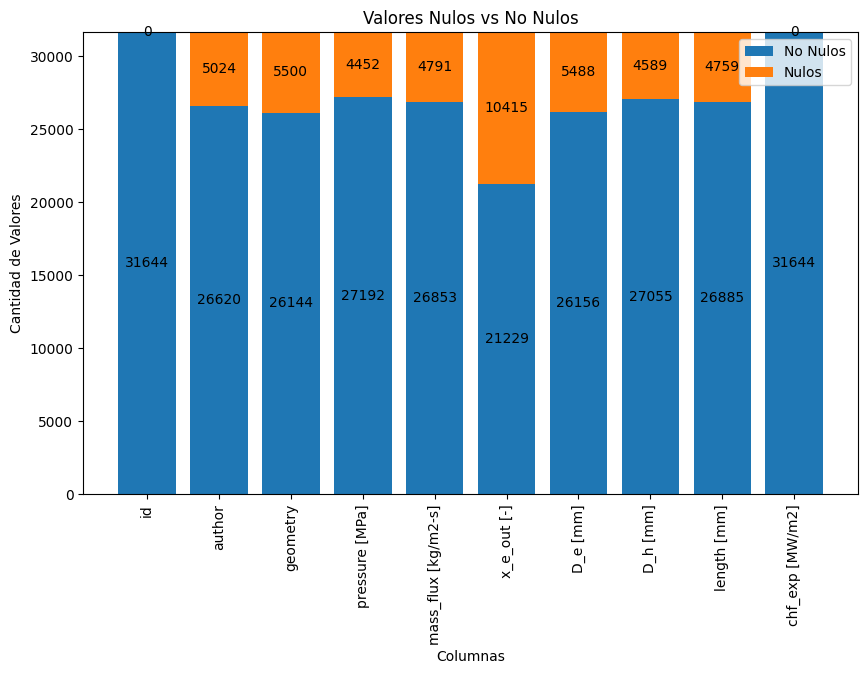

In [5]:
import matplotlib.pyplot as plt

# Calcula la cantidad de valores nulos y no nulos en cada columna
null_counts = data.isnull().sum()
nonnull_counts = data.notnull().sum()

# Crea una lista con los nombres de las columnas
column_names = data.columns.tolist()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crea las barras apiladas
ax.bar(column_names, nonnull_counts, label='No Nulos')
ax.bar(column_names, null_counts, bottom=nonnull_counts, label='Nulos')

# Configura el título y las etiquetas de los ejes
ax.set_title('Valores Nulos vs No Nulos')
ax.set_xlabel('Columnas')
ax.set_ylabel('Cantidad de Valores')

# Muestra la leyenda
ax.legend()

# Rota las etiquetas del eje x para mejorar la legibilidad si hay muchas columnas
plt.xticks(rotation=90)

# Agrega los valores a las barras
for i, (nonnull_count, null_count) in enumerate(zip(nonnull_counts, null_counts)):
    ax.annotate(str(nonnull_count), (i, nonnull_count/2), ha='center', va='center')
    ax.annotate(str(null_count), (i, nonnull_count + null_count/2), ha='center', va='center')

# Muestra la gráfica de barras
plt.show()


In [6]:
# Calcular la media por geometría. 

geometry_list = data['geometry'].unique()
averages = {}

for geometry in geometry_list:
    geometry_df = data[data['geometry'] == geometry]
    geometry_averages = geometry_df.mean()
    averages[geometry] = geometry_averages

# Imprimir las medias
for geometry, avg_values in averages.items():
    print(f"Media para Geometry: {geometry}")
    print(avg_values)
    print()


Media para Geometry: tube
id                     15821.950674
pressure [MPa]            11.163435
mass_flux [kg/m2-s]     3234.336062
x_e_out [-]               -0.010808
D_e [mm]                   8.406165
D_h [mm]                   8.736598
length [mm]              661.744978
chf_exp [MW/m2]            3.928603
dtype: float64

Media para Geometry: nan
id                     NaN
author                 NaN
geometry               NaN
pressure [MPa]         NaN
mass_flux [kg/m2-s]    NaN
x_e_out [-]            NaN
D_e [mm]               NaN
D_h [mm]               NaN
length [mm]            NaN
chf_exp [MW/m2]        NaN
dtype: object

Media para Geometry: annulus
id                     16016.758959
pressure [MPa]             9.472251
mass_flux [kg/m2-s]     2456.423397
x_e_out [-]                0.052503
D_e [mm]                   8.792583
D_h [mm]                  26.455987
length [mm]             1783.605341
chf_exp [MW/m2]            2.907669
dtype: float64

Media para Geometry: plate


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [6]:

import pandas as pd

# Calcular la media por geometría.
geometry_list = data['geometry'].unique()
averages = {}

for geometry in geometry_list:
    geometry_df = data[data['geometry'] == geometry]
    geometry_averages = geometry_df.mean()
    averages[geometry] = geometry_averages

# Concatenar las tablas de medias en una sola tabla
concatenated_table = pd.concat(averages, axis=1)

# Imprimir las medias concatenadas
print(concatenated_table)


                             tube  NaN       annulus         plate
id                   15821.950674  NaN  16016.758959  15707.048544
pressure [MPa]          11.163435  NaN      9.472251      0.908117
mass_flux [kg/m2-s]   3234.336062  NaN   2456.423397   1563.629344
x_e_out [-]             -0.010808  NaN      0.052503     -0.033045
D_e [mm]                 8.406165  NaN      8.792583     14.750193
D_h [mm]                 8.736598  NaN     26.455987    117.063269
length [mm]            661.744978  NaN   1783.605341     28.539924
chf_exp [MW/m2]          3.928603  NaN      2.907669      5.279288
author                        NaN  NaN           NaN           NaN
geometry                      NaN  NaN           NaN           NaN


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


In [7]:
desc = pd.DataFrame(index = list(data))
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['%unique'] = desc['nunique'] / len(data) * 100
desc['null'] = data.isnull().sum()
desc['type'] = data.dtypes
desc = pd.concat([desc, data.describe().T], axis = 1)
desc


,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
id,31644,31644,100.000000,0,int64,31644.0,15821.500000,9134.980296,0.0000,7910.7500,15821.5000,23732.2500,31643.000
author,26620,10,0.031602,5024,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geometry,26144,3,0.009480,5500,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure [MPa],27192,144,0.455063,4452,float64,27192.0,10.640747,4.333683,0.1000,6.8900,11.0700,13.7900,20.680
mass_flux [kg/m2-s],26853,733,2.316395,4791,float64,26853.0,3068.011023,1777.032080,0.0000,1519.0000,2731.0000,4069.0000,7975.000
x_e_out [-],21229,1682,5.315384,10415,float64,21229.0,-0.000453,0.100911,-0.8667,-0.0466,0.0038,0.0648,0.232
D_e [mm],26156,43,0.135887,5488,float64,26156.0,8.629255,5.185692,1.0000,5.0000,7.8000,10.8000,37.500
D_h [mm],27055,49,0.154848,4589,float64,27055.0,14.174330,19.838489,1.0000,5.6000,10.0000,11.5000,120.000
length [mm],26885,70,0.221211,4759,float64,26885.0,832.987391,672.299239,10.0000,318.0000,610.0000,914.0000,3048.000
chf_exp [MW/m2],31644,109,0.344457,0,float64,31644.0,3.796985,1.983991,0.8000,2.4000,3.4000,4.6000,19.300


In [8]:
# Detallamos en el dataset la variables categóricas y númericas. 

categorical_features = data.columns[:2]
numerical_features = data.columns[2:]

print(categorical_features)
print(numerical_features)


Index(['id', 'author'], dtype='object')
Index(['geometry', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]',
       'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'],
      dtype='object')


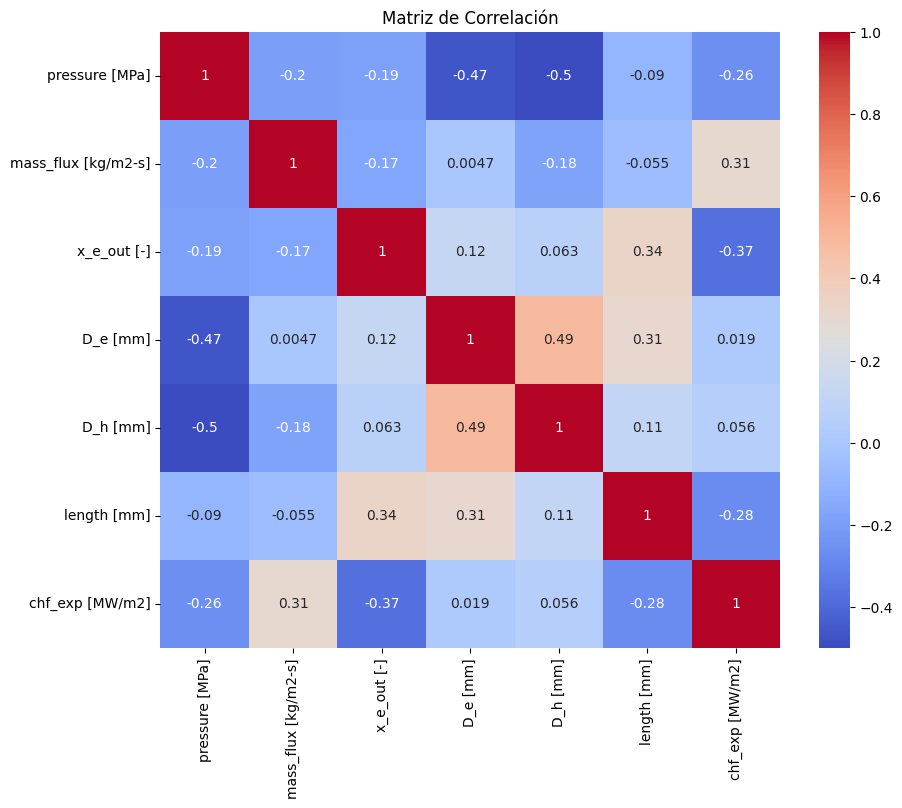

In [9]:
# Vemos la matriz de correlación entre las variables númericas. 


# Filtra solo las variables numéricas del DataFrame
numerical_data = data[numerical_features]

# Calcula la matriz de correlación
correlation_matrix = numerical_data.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Genera el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Configura los nombres de los ejes y el título
plt.xlabel('')
plt.ylabel('')
plt.title('Matriz de Correlación')

# Muestra la figura
plt.show()


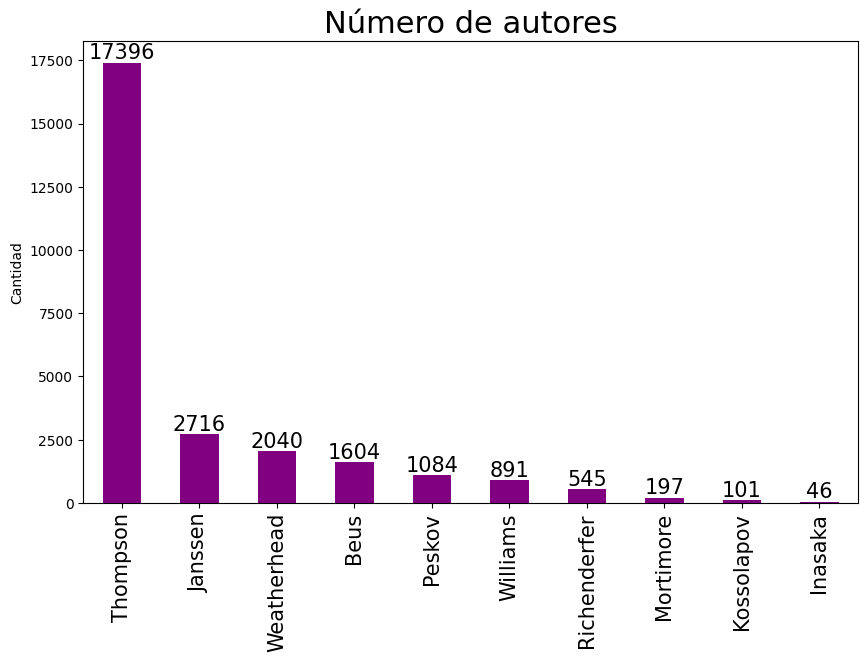

In [39]:

# Contar el número de autores y el número de veces que aparece en el dataset. 
author_counts = data['author'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6),)
ax = author_counts.plot(kind='bar', color="purple")
plt.title('Número de autores', size=22)
plt.xlabel('',)
plt.ylabel('Cantidad')

# Mostrar los valores sobre las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', size=15)

# Ajustar el tamaño de fuente para los nombres de los autores
plt.xticks(fontsize=15)

plt.show()


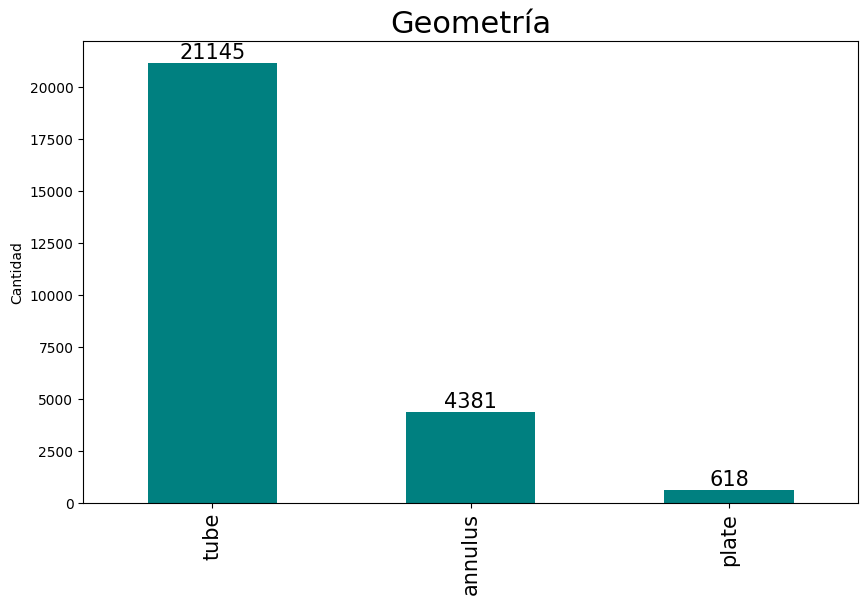

In [40]:
# Contar el número de geometría según el tipo. 
 
geometry_counts = data['geometry'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
ax = geometry_counts.plot(kind='bar', color="teal")
plt.title('Geometría', size=22)
plt.xlabel('')
plt.ylabel('Cantidad')

# Mostrar los valores sobre las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', size=15)

# Ajustar el tamaño de fuente para los nombres de las geometrias
plt.xticks(fontsize=15)

plt.show()